In [30]:
# sample knn regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline



In [31]:
# read in the data from Advertising.csv file
data = pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
# KNN by hand of K = 1
# use subset of data i.e 5 rows to 13
# use tv as predictor and sales as response
x_true = data.TV.iloc[5:13]
x_true
type(x_true)

pandas.core.series.Series

In [33]:
y_true = data.Sales.iloc[5:13]
y_true
type(y_true)

pandas.core.series.Series

In [34]:
idx = np.argsort(x_true).values
idx

array([3, 0, 7, 1, 5, 2, 4, 6], dtype=int64)

In [35]:
x_true = x_true.iloc[idx].values
x_true

array([  8.6,   8.7,  23.8,  57.5,  66.1, 120.2, 199.8, 214.7])

In [36]:
y_true = y_true.iloc[idx].values
y_true

array([ 4.8,  7.2,  9.2, 11.8,  8.6, 13.2, 10.6, 17.4])

In [38]:
# edtest (test_find_nearest) ###
# define a function to find the index of the nearest neighbor
# and returns the value of nearest neighbor
# note that this is just k = 1 where distance function is just
# absolute value

def find_nearest(array, value):
    #hint: to find idx use .idxmin() function
    idx = pd.Series(np.abs(array - value)).idxmin()

    # return the nearest neighbor and value
    return idx, array[idx]


In [45]:
# Create some senthetic x-values (might be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))
x

array([  8.6       ,  12.80612245,  17.0122449 ,  21.21836735,
        25.4244898 ,  29.63061224,  33.83673469,  38.04285714,
        42.24897959,  46.45510204,  50.66122449,  54.86734694,
        59.07346939,  63.27959184,  67.48571429,  71.69183673,
        75.89795918,  80.10408163,  84.31020408,  88.51632653,
        92.72244898,  96.92857143, 101.13469388, 105.34081633,
       109.54693878, 113.75306122, 117.95918367, 122.16530612,
       126.37142857, 130.57755102, 134.78367347, 138.98979592,
       143.19591837, 147.40204082, 151.60816327, 155.81428571,
       160.02040816, 164.22653061, 168.43265306, 172.63877551,
       176.84489796, 181.05102041, 185.25714286, 189.46326531,
       193.66938776, 197.8755102 , 202.08163265, 206.2877551 ,
       210.49387755, 214.7       ])

In [46]:
# initialise the y-values for lenth of synthetic x-values
y = np.zeros(len(x))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# apply the Knn algorithm to predict the y-values for the given x-values
for i, xi in enumerate(x):
    # get the sales values closest to the x value
    y[i] = y_true[find_nearest(x_true, xi)[0]]

Text(0, 0.5, 'Sales in $1000s')

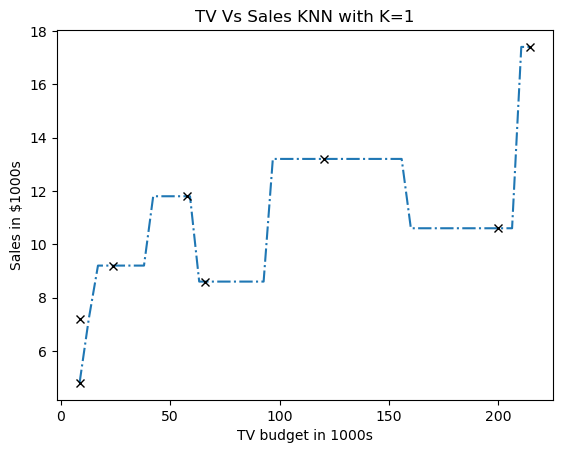

In [48]:
#ploting the data
plt.plot(x, y, '-.')
#plot original data using black x's
plt.plot(x_true, y_true, 'kx')

#set title and axis labels
plt.title('TV Vs Sales KNN with K=1')
plt.xlabel('TV budget in 1000s')
plt.ylabel('Sales in $1000s')

Part 2 KNN > 1 using sklearn

In [51]:
#read data from file advertising.csv
df = pd.read_csv('Advertising.csv')
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
x = df[['TV']]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [57]:
y = df[['Sales']]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [58]:
#split the dataset in to training and testing set with 60% training and 40% testing and random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=42)

In [60]:
#choose minimum K value as 1
k_min = 1

In [61]:
#choose maximum K value as 70
k_max = 70


In [64]:
#create a list of values from k_min to k_max using linespace function
k_list = np.linspace(k_min, k_max, 70)
k_list

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70.])

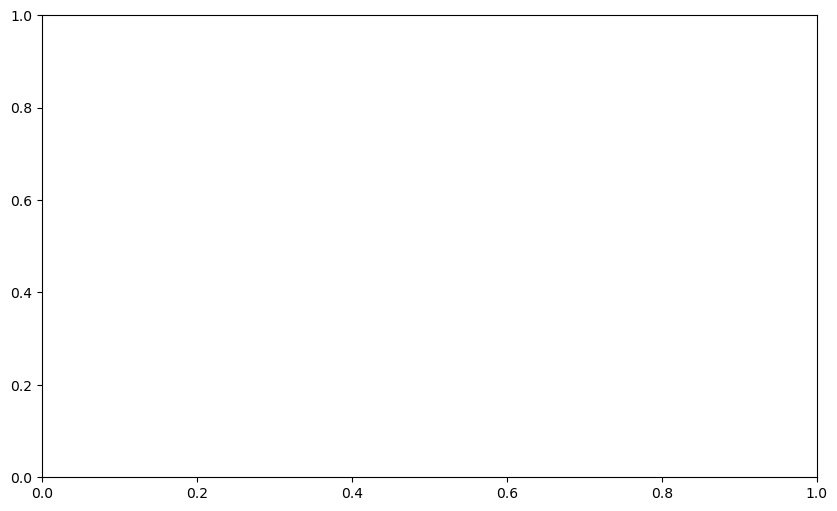

In [66]:
#set the grid to plot the values
fig, ax = plt.subplots(figsize=(10, 6))

In [67]:
#variable to alter the line width with each plot
j = 0


In [72]:
#loop over the k values
for i in k_list:
    # create regression model
    model = KNeighborsRegressor(n_neighbors=int(i))
    #fitting regression model with training data
    model.fit(x_train, y_train)
    # use the train model to predict the test data
    y_pred = model.predict(x_test)
    #helper code to plot the data along with model prediction
    colors = ['grey', 'r','b']
    if i in [1, 10, 70]:
        x_train = np.linspace(x.min(), x.max(), 100)
        y_train = model.predict(x_train)
        ax.plot(x_train, y_train, '-.', label = 'train', linewidth=j+2)
        j += 1

ax.legend(loc='lower right', fontsize=14)
ax.plot(x_train,y_train,'x', label='Training Data', color = 'k')
ax.set_xlabel('TV budget in 1000s', fontsize=14)
ax.set_ylabel('Sales in $1000s', fontsize=14)
plt.tight_layout()

c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without

<Figure size 640x480 with 0 Axes>